         asin                                      product_title  \
0  B0BQ118F2T  Moto G Play 2023 3-Day Battery Unlocked Made f...   
1  B0CV2W1TKZ  Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...   
2  B09SM24S8C  Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...   
3  B0CHH1N9VY  TracFone | Motorola Moto g Pure | Locked | 32G...   
4  B09T3MQSVP  Samsung Galaxy A13 5G Cell Phone, AT&amp;T GSM...   

  product_price product_original_price currency  product_star_rating  \
0        $99.00                $169.99      USD                  4.0   
1       $153.99                    NaN      USD                  4.2   
2        $69.00                 $99.99      USD                  3.8   
3        $49.99                    NaN      USD                  4.2   
4        $88.09                 $98.27      USD                  3.8   

   product_num_ratings                           product_url  \
0                 1319  https://www.amazon.com/dp/B0BQ118F2T   
1                  186  https:

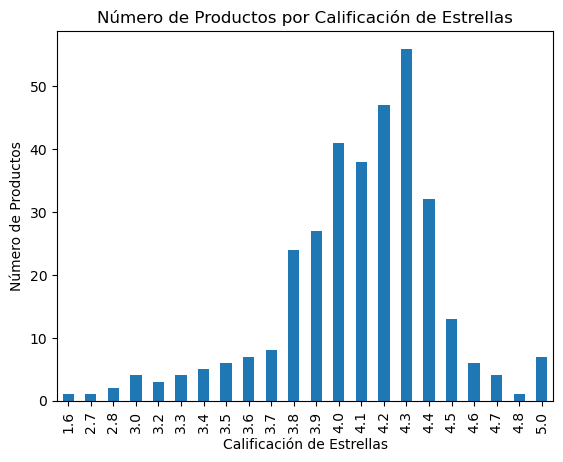

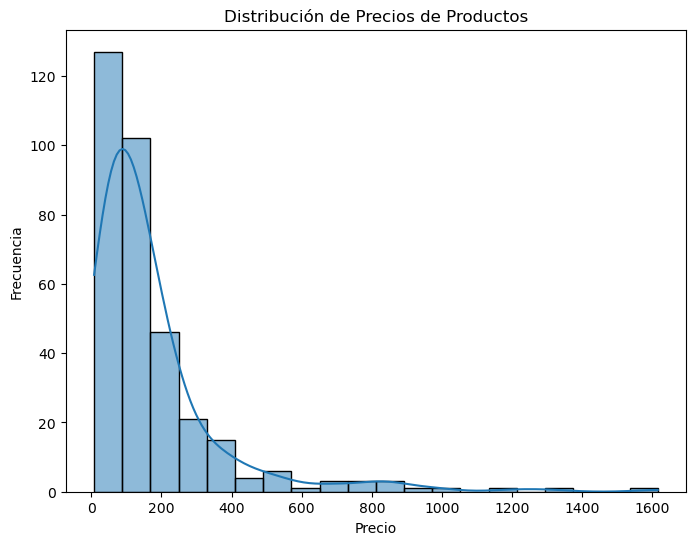

-----------------------
Producto más calificado: Apple iPhone XR, 64GB, Black - Unlocked (Renewed) con 64977 calificaciones.
--------------------------
                                       product_title  product_price  \
0  Moto G Play 2023 3-Day Battery Unlocked Made f...          99.00   
1  Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RA...         153.99   
2  Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...          69.00   
3  TracFone | Motorola Moto g Pure | Locked | 32G...          49.99   
4  Samsung Galaxy A13 5G Cell Phone, AT&amp;T GSM...          88.09   
5  Panasonic Cordless Phone with Answering Machin...          49.99   
6  Motorola Moto G 5G | 2023 | Unlocked | Made fo...         149.99   
7  Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Un...         149.50   
8  Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Un...         139.99   
9  TracFone | Samsung Galaxy A03s | Locked | 32GB...          59.99   

  product_original_price   discount  
0                $169.99  41

In [39]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo csv
df = pd.read_csv('phone_search.csv')

# Mostrar las primeras filas y columnas
print(df.head())
print(df.columns)

print("------------------------\n")

# Agrupar por calificación de estrellas y contar
print("Calificación/Cantidad de productos con esa calificación")
ratings_count = df.groupby('product_star_rating')['asin'].count()
print(ratings_count)

print("-----------------------------")

# Convertir 'product_price' a tipo numérico
df['product_price'] = df['product_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Gráfico de barras de productos por calificación
ratings_count.plot(kind='bar')
plt.title('Número de Productos por Calificación de Estrellas')
plt.xlabel('Calificación de Estrellas')
plt.ylabel('Número de Productos')
plt.show()

# Histograma de precios
plt.figure(figsize=(8, 6))
sns.histplot(df['product_price'], bins=20, kde=True)
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

print("-----------------------")

# Producto con mayor número de calificaciones
producto_mas_calificado = df.loc[df['product_num_ratings'].idxmax()]
print(f"Producto más calificado: {producto_mas_calificado['product_title']} con {producto_mas_calificado['product_num_ratings']} calificaciones.")
print("--------------------------")

# Crear una columna de descuento
df['discount'] = ((df['product_original_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float) - df['product_price']) / 
                   df['product_original_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)) * 100
print(df[['product_title', 'product_price', 'product_original_price', 'discount']].head(10))

print("-----------------------")

# Calcular estadísticas con NumPy
precios = df['product_price'].dropna()

# Media
media = np.mean(precios)
print(f"Media de los precios: {media:.2f}")

# Mediana
mediana = np.median(precios)
print(f"Mediana de los precios: {mediana:.2f}")

# Moda 
moda = stats.mode(precios)
print(f"Moda de los precios: {moda.mode}")
print(f"El valor de la moda aparece {moda.count} veces.")

# Desviación estándar
desviacion_estandar = np.std(precios)
print(f"Desviación estándar de los precios: {desviacion_estandar:.2f}")

# Varianza
varianza = np.var(precios)
print(f"Varianza de los precios: {varianza:.2f}")
